# Question 2

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


np.random.seed(99)

rng = np.random.default_rng()

In [2]:
def calculate_expected_risk(confusion_matrix, loss_matrix):
    # Since confusion_matrix is a NumPy array, you can directly use it
    total_samples = np.sum(confusion_matrix)  # No need for .values
    risk = 0
    num_classes = confusion_matrix.shape[0]  # Get the number of classes

    # Calculate expected risk based on the confusion matrix and loss matrix
    for i in range(num_classes):
        for j in range(num_classes):
            risk += (confusion_matrix[i, j] / total_samples) * loss_matrix[i, j]

    return risk

## Part A

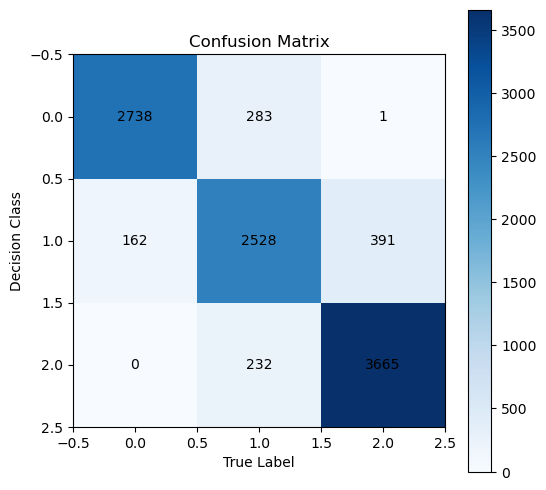

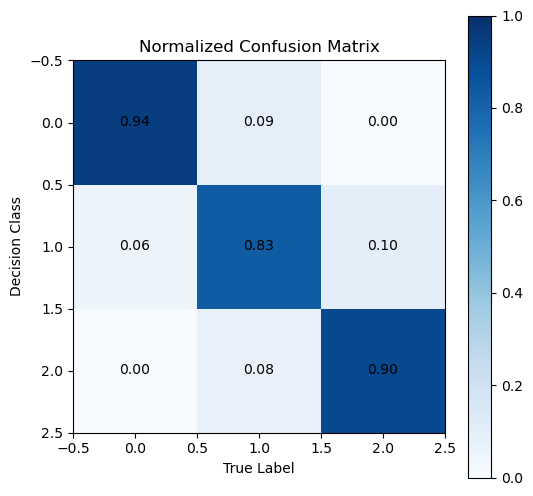

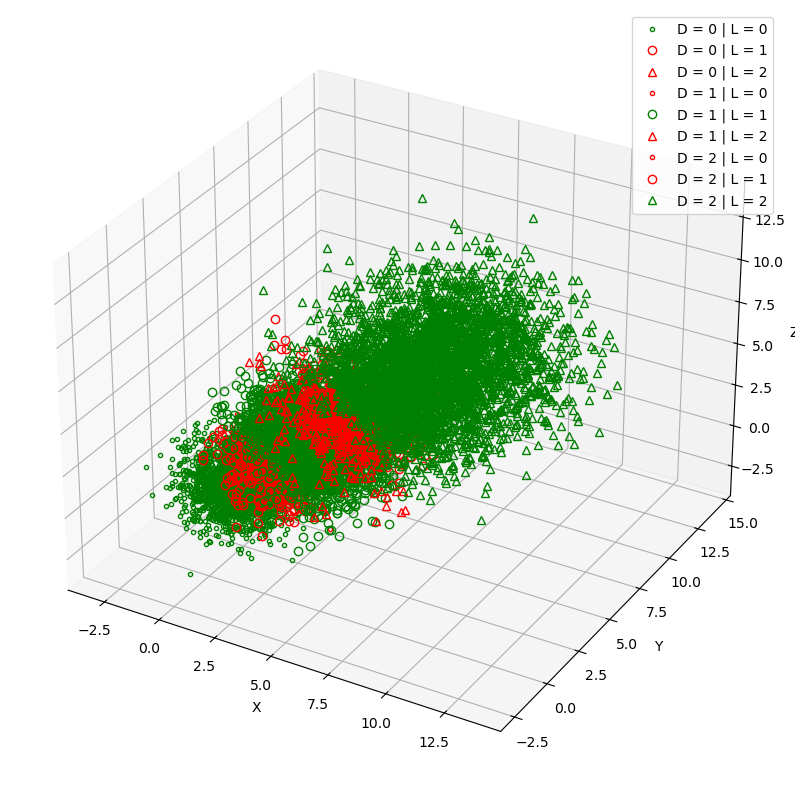

Minimum Expected Risk: 0.1069


In [3]:
priors = np.array([0.3, 0.3, 0.4])

# mean and covariance for every gaussian distribution
gaussian_parameters = [
    (np.array([1, 1, 1]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])),
    (np.array([3, 3, 3]), np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])),
    (np.array([5, 5, 5]), np.array([[3, 0, 0], [0, 3, 0], [0, 0, 3]])),
    (np.array([7, 7, 7]), np.array([[4, 0, 0], [0, 4, 0], [0, 0, 4]]))
]

num_samples = 10000
num_dim = 3
num_classes = 3
class_labels = np.random.choice(a=[0,1,2], size=num_samples, p=priors)
x = np.zeros(shape=[num_samples, num_dim])
for i in range(num_samples):
    class_label = class_labels[i]
    if class_label in range(2):
        mean, cov = gaussian_parameters[class_label]
        x[i,:] = np.random.multivariate_normal(mean, cov)
    else:
        gaussian_choice = rng.choice([2, 3]) # select either the 3rd or 4th gaussian with 0.5 prob each
        mean, cov = gaussian_parameters[gaussian_choice]
        x[i,:] = np.random.multivariate_normal(mean, cov)

posteriors = np.zeros((num_samples, num_classes))

for class_label in range(num_classes):
    if class_label in range(2):
        mean, cov = gaussian_parameters[class_label]
        posteriors[:, class_label] = multivariate_normal.pdf(x, mean, cov) * priors[class_label]
    else:
        posteriors[:, class_label] = 0.5 * (multivariate_normal.pdf(x, gaussian_parameters[2][0], gaussian_parameters[2][1]) + 
                                            multivariate_normal.pdf(x, gaussian_parameters[3][0], gaussian_parameters[3][1])) * priors[class_label]



# Bayes classifier with 0-1 loss (minimum probability of error classification rule)
# The decision rule is the argmax of the posterior
decisions = np.argmax(posteriors, axis = 1)

# Create the confusion matrix (prediced_labels are decisions here)
conf_matrix = confusion_matrix(class_labels, decisions).T

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel('True Label')
plt.ylabel('Decision Class')
plt.colorbar()

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.show()


# Normalize the confusion matrix by row (i.e., by the number of actual instances per class)
col_sums = conf_matrix.sum(axis=0, keepdims=True)
normalized_decision_conf_matrix = conf_matrix / col_sums

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(normalized_decision_conf_matrix, cmap='Blues', vmin=0, vmax=1)

plt.title("Normalized Confusion Matrix")
plt.xlabel('True Label')
plt.ylabel('Decision Class')
plt.colorbar()

for i in range(normalized_decision_conf_matrix.shape[0]):
    for j in range(normalized_decision_conf_matrix.shape[1]):
        plt.text(j, i, f'{normalized_decision_conf_matrix[i, j]:.2f}', 
                 ha='center', va='center', color='black')

# Display the plot
plt.show()


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Set of marker shapes
marker_shapes = '.o^'

# Loop through each class and decision to plot
for d in range(num_classes):
    for c in range(num_classes):
        indices = np.where((decisions == d) & (class_labels == c))
        points = x[indices]
        color = 'g' if d == c else 'r'
        label = f"D = {d} | L = {c}"
        ax.plot(points[:, 0], points[:, 1], points[:, 2], marker=marker_shapes[c], color=color, 
                markerfacecolor='none', linestyle='None', label=label)

# Adjust padding for axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend and show plot
ax.legend()
plt.show()

loss_matrix_1 = np.array([[0, 1, 1],
                        [1, 0, 1],
                        [1, 1, 0]])
expected_risk_1 = calculate_expected_risk(conf_matrix.T, loss_matrix_1)

print(f"Minimum Expected Risk: {expected_risk_1}")


## Part B

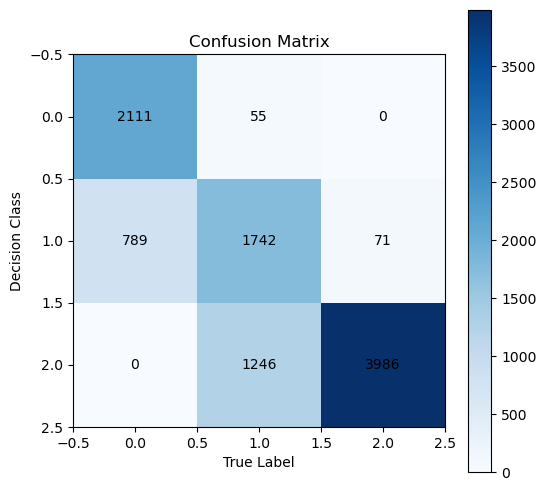

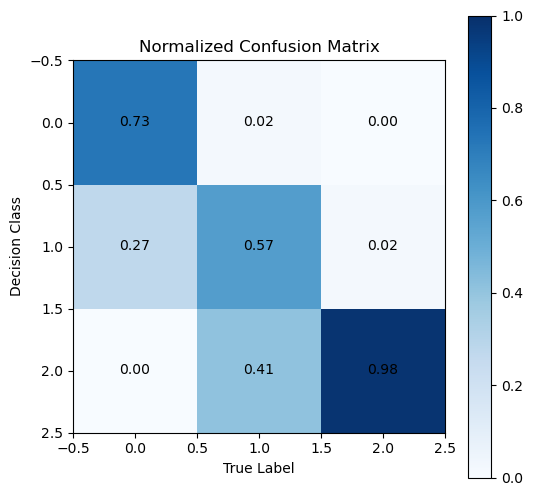

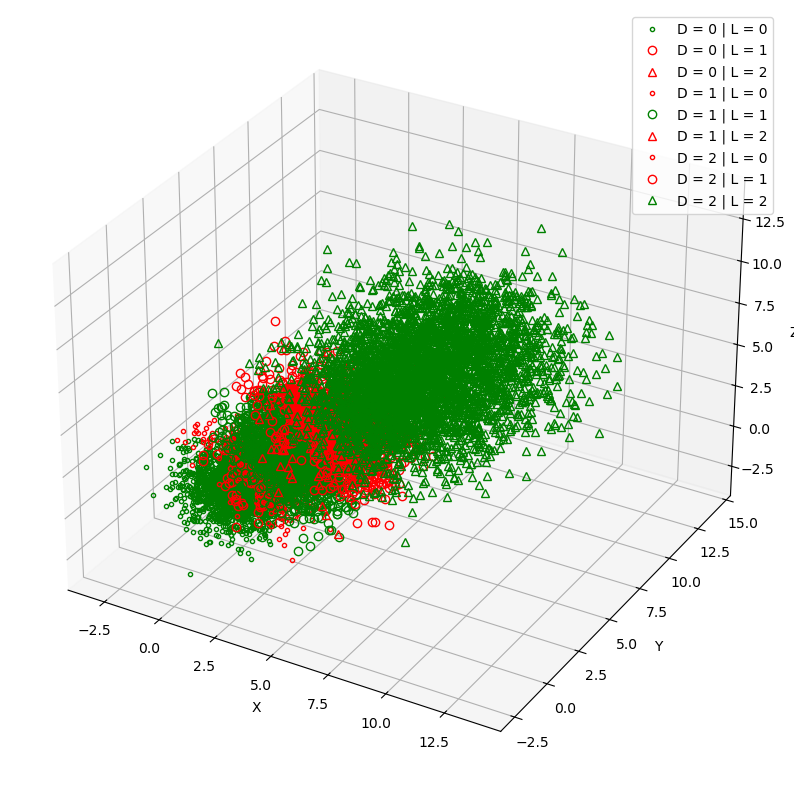

Minimum Expected Risk: 2.0475999999999996


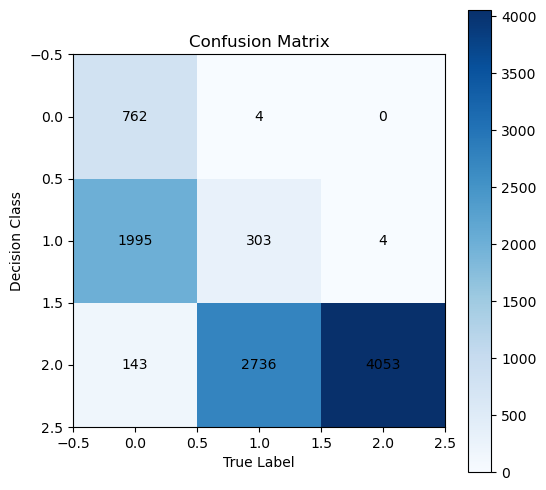

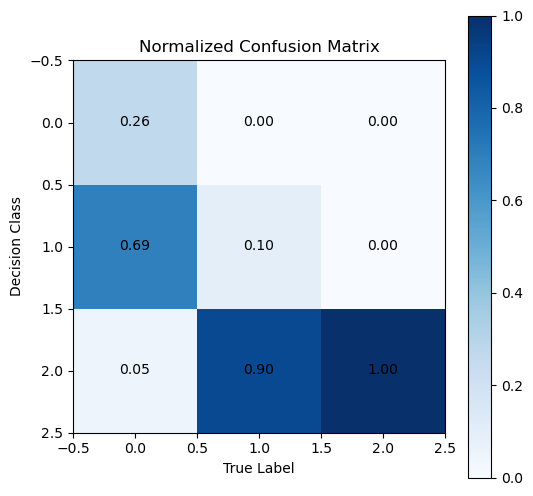

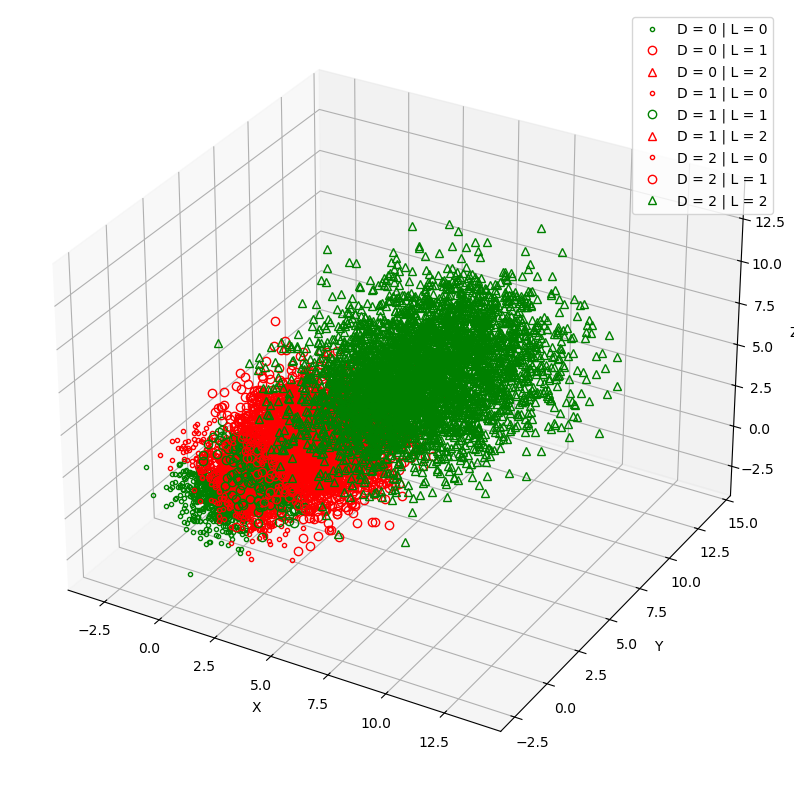

Minimum Expected Risk: 48.7408


In [4]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


np.random.seed(99)

rng = np.random.default_rng()

priors = np.array([0.3, 0.3, 0.4])

# mean and covariance for every gaussian distribution
gaussian_parameters = [
    (np.array([1, 1, 1]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])),
    (np.array([3, 3, 3]), np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])),
    (np.array([5, 5, 5]), np.array([[3, 0, 0], [0, 3, 0], [0, 0, 3]])),
    (np.array([7, 7, 7]), np.array([[4, 0, 0], [0, 4, 0], [0, 0, 4]]))
]

num_samples = 10000
num_dim = 3
num_classes = 3
class_labels = np.random.choice(a=[0,1,2], size=num_samples, p=priors)
x = np.zeros(shape=[num_samples, num_dim])
for i in range(num_samples):
    class_label = class_labels[i]
    if class_label in range(2):
        mean, cov = gaussian_parameters[class_label]
        x[i,:] = np.random.multivariate_normal(mean, cov)
    else:
        gaussian_choice = rng.choice([2, 3]) # select either the 3rd or 4th gaussian with 0.5 prob each
        mean, cov = gaussian_parameters[gaussian_choice]
        x[i,:] = np.random.multivariate_normal(mean, cov)

posteriors = np.zeros((num_samples, num_classes))

for class_label in range(num_classes):
    if class_label in range(2):
        mean, cov = gaussian_parameters[class_label]
        posteriors[:, class_label] = multivariate_normal.pdf(x, mean, cov) * priors[class_label]
    else:
        posteriors[:, class_label] = 0.5 * (multivariate_normal.pdf(x, gaussian_parameters[2][0], gaussian_parameters[2][1]) + 
                                            multivariate_normal.pdf(x, gaussian_parameters[3][0], gaussian_parameters[3][1])) * priors[class_label]


loss_matrix_10 = np.array([[0, 10, 10],
                        [1, 0, 10],
                        [1, 1, 0]])

loss_matrix_100 = np.array([[0, 100, 100],
                        [1, 0, 100],
                        [1, 1, 0]])

loss_matrices = [loss_matrix_10, loss_matrix_100]

for loss_matrix in loss_matrices:

    # Risks are calculated by multiplying the posterior probabilities with the transpose of the loss matrix
    # ERM is computed by determining the class with the minimum risk for each sample
    risks = np.dot(posteriors, loss_matrix.T)
    decisions = np.argmin(risks, axis=1)

    # Create the confusion matrix (prediced_labels are decisions here)
    conf_matrix = confusion_matrix(class_labels, decisions).T

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, cmap='Blues')

    plt.title("Confusion Matrix")
    plt.xlabel('True Label')
    plt.ylabel('Decision Class')
    plt.colorbar()

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

    plt.show()


    # Normalize the confusion matrix by row (i.e., by the number of actual instances per class)
    col_sums = conf_matrix.sum(axis=0, keepdims=True)
    normalized_decision_conf_matrix = conf_matrix / col_sums

    # Plot the normalized confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(normalized_decision_conf_matrix, cmap='Blues', vmin=0, vmax=1)

    plt.title("Normalized Confusion Matrix")
    plt.xlabel('True Label')
    plt.ylabel('Decision Class')
    plt.colorbar()

    for i in range(normalized_decision_conf_matrix.shape[0]):
        for j in range(normalized_decision_conf_matrix.shape[1]):
            plt.text(j, i, f'{normalized_decision_conf_matrix[i, j]:.2f}', 
                    ha='center', va='center', color='black')

    # Display the plot
    plt.show()

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # Set of marker shapes
    marker_shapes = '.o^'

    # Loop through each class and decision to plot
    for d in range(num_classes):
        for c in range(num_classes):
            indices = np.where((decisions == d) & (class_labels == c))
            points = x[indices]
            color = 'g' if d == c else 'r'
            label = f"D = {d} | L = {c}"
            ax.plot(points[:, 0], points[:, 1], points[:, 2], marker=marker_shapes[c], color=color, 
                    markerfacecolor='none', linestyle='None', label=label)

    # Adjust padding for axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add legend and show plot
    ax.legend()
    plt.show()

    expected_risk = calculate_expected_risk(conf_matrix.T, loss_matrix)

    print(f"Minimum Expected Risk: {expected_risk}")